In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler, OneHotEncoder, Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve

In [3]:
filepath = r"C:\Users\TomOldmeadow\Documents\Training\PowerBI\Tech_Report_SO2024\survey_results_public.csv"
df24 = pd.read_csv(filepath)
df24.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Potential influencing columns:
- Age: 'Age'

- Experience years: 'WorkExp', 'YearsCodePro'

- Developer role: 'DevType', 'JobSat'

- Companies’ tech factors (company size, remote vs office): 'OrgSize', 'RemoteWork', 'Industry'

- Documentation learnt from: 'TechDoc'

- AI tool usage: 'AISelect', 'AISent', 'AIBen', 'AIAcc', 'AIThreat', 'AIEthics', 'AIChallenges'

- education level: 'EdLevel'

- language preferences: 'Language', 'ToolsTech'

In [4]:
df24_ext = df24[['Age', 'WorkExp', 'YearsCodePro', 'DevType', 'JobSat', 'OrgSize',
                 'RemoteWork', 'Industry', 'TechDoc', 'AISelect', 'AISent',
                 'AIBen', 'AIAcc', 'AIThreat', 'AIEthics', 'AIChallenges',
                 'EdLevel']]

df24_ext.head()

,Age,WorkExp,YearsCodePro,DevType,JobSat,OrgSize,RemoteWork,Industry,TechDoc,AISelect,AISent,AIBen,AIAcc,AIThreat,AIEthics,AIChallenges,EdLevel
0,Under 18 years old,NaN,NaN,NaN,NaN,NaN,Remote,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,Primary/elementary school
1,35-44 years old,17.0,17,"Developer, full-stack",NaN,NaN,Remote,NaN,API document(s) and/or SDK document(s);User gu...,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
2,45-54 years old,NaN,27,Developer Experience,NaN,NaN,Remote,NaN,API document(s) and/or SDK document(s);User gu...,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
3,18-24 years old,NaN,NaN,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity;Greater efficiency;Impro...,Somewhat trust,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers,Some college/university study without earning ...
4,18-24 years old,NaN,NaN,"Developer, full-stack",NaN,NaN,NaN,NaN,API document(s) and/or SDK document(s);User gu...,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,"Secondary school (e.g. American high school, G..."


In [5]:
# Remove null vaues from the AIAcc i.e. trust in AI column
df24_ext = df24_ext.dropna(subset=['AIAcc'], axis=0)

# Feature Engineering the target variable 'AITrust'
df24_ext['AITrust'] = df24_ext['AIAcc'].apply(lambda x: 1 if x in ['Highly trust', 'Somewhat trust'] else 0)

In [6]:
# Check for none values across the columns by percentage
(df24_ext.isnull().mean() * 100).round(2).sort_values(ascending=False)

Industry        51.63
JobSat          51.17
WorkExp         50.34
TechDoc         34.47
OrgSize         23.40
AIChallenges    17.83
YearsCodePro    16.76
RemoteWork      15.48
AIEthics         9.69
DevType          5.05
EdLevel          3.94
AIThreat         2.72
AIBen            1.29
AISent           0.07
Age              0.00
AISelect         0.00
AIAcc            0.00
AITrust          0.00
dtype: float64

**Based off of high null values, remove:**
- Industry
- JobSat
- WorkExp (Covered similarly by YearsCodePro)
- Techdoc (Perhaps not so relevant anyway and high nulls not worth the time)
- OrgSize (Potentially useful but too sparse)

**Based off moderate null values:**
- AIEthics (String information not relevant to whether or not someone trusts AI, but rather how) -> remove
- AIChallenges (Similar problem to AIEthics) -> Remove
- RemoteWork -> Impute values - Use 'unknown' bucket to categorise none values (standard practice)
- YearsCodePro -> Impute values - Use median value to fill nulls (standard practice)

**Low nulls < 5%**
- DevType          5.05 -> Drop rows with missing values - Also consider a cutoff point for number of data points collected for each DevType later in model Development
- EdLevel          3.94 -> Drop rows with missing values
- AIThreat         2.72 -> Drop rows with missing values
- AIBen            1.29 -> Drop column - does not directly affect feeling toward AI trust but rather questions their used tools
- AISent           0.07 -> Drop rows with missing values
- Age              0.00
- AISelect         0.00
- AIAcc            0.00

### Data Cleansing

In [12]:
# Drop high-null or irrelevant columns
df24c = df24_ext.drop(columns=[
    'Industry', 'JobSat', 'WorkExp', 'TechDoc', 'OrgSize',
    'AIEthics', 'AIChallenges', 'AIBen'
])

# Impute 'RemoteWork' with 'Unknown'
df24c['RemoteWork'] = df24c['RemoteWork'].fillna('Unknown')

# Convert YearsCodePro to numeric and impute missing with median
df24c['YearsCodePro'] = pd.to_numeric(df24c['YearsCodePro'], errors='coerce')
df24c['YearsCodePro'] = df24c['YearsCodePro'].fillna(df24c['YearsCodePro'].median())

# Drop rows with missing values in key low-null columns
df24c = df24c.dropna(subset=[
    'DevType', 'EdLevel', 'AIThreat', 'AISent'
])

# All remaining people in the survey answered 'yes' to 'AISelect' so the column can be dropped
df24c = df24c.drop(columns = ['AISelect'])


In [8]:
df24c.head()

,Age,YearsCodePro,DevType,RemoteWork,AISent,AIAcc,AIThreat,EdLevel,AITrust
3,18-24 years old,7.0,"Developer, full-stack",Unknown,Very favorable,Somewhat trust,No,Some college/university study without earning ...,1
5,Under 18 years old,7.0,Student,Unknown,Favorable,Somewhat trust,No,Primary/elementary school,1
7,18-24 years old,7.0,Student,Unknown,Indifferent,Somewhat distrust,Yes,"Secondary school (e.g. American high school, G...",0
9,35-44 years old,11.0,"Developer, full-stack",Remote,Indifferent,Neither trust nor distrust,I'm not sure,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0
10,35-44 years old,7.0,Project manager,Remote,Favorable,Somewhat distrust,No,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0


### How the columns should be encoded for relative comparison

- Age: OneHotEncode
- YearsCodePro: No change needed
- DevType: Potentially ordinal? Otherwise OneHotEncode
- RemoteWork: OneHotEncode
- AISent: Ordinal
- AIAcc: Ordinal - does this need removing? Final feature is based off this
- AIThreat: Ordinal/ Binary
- EdLevel: Ordinal potentially? Otherwise OneHotEncode

<Axes: >

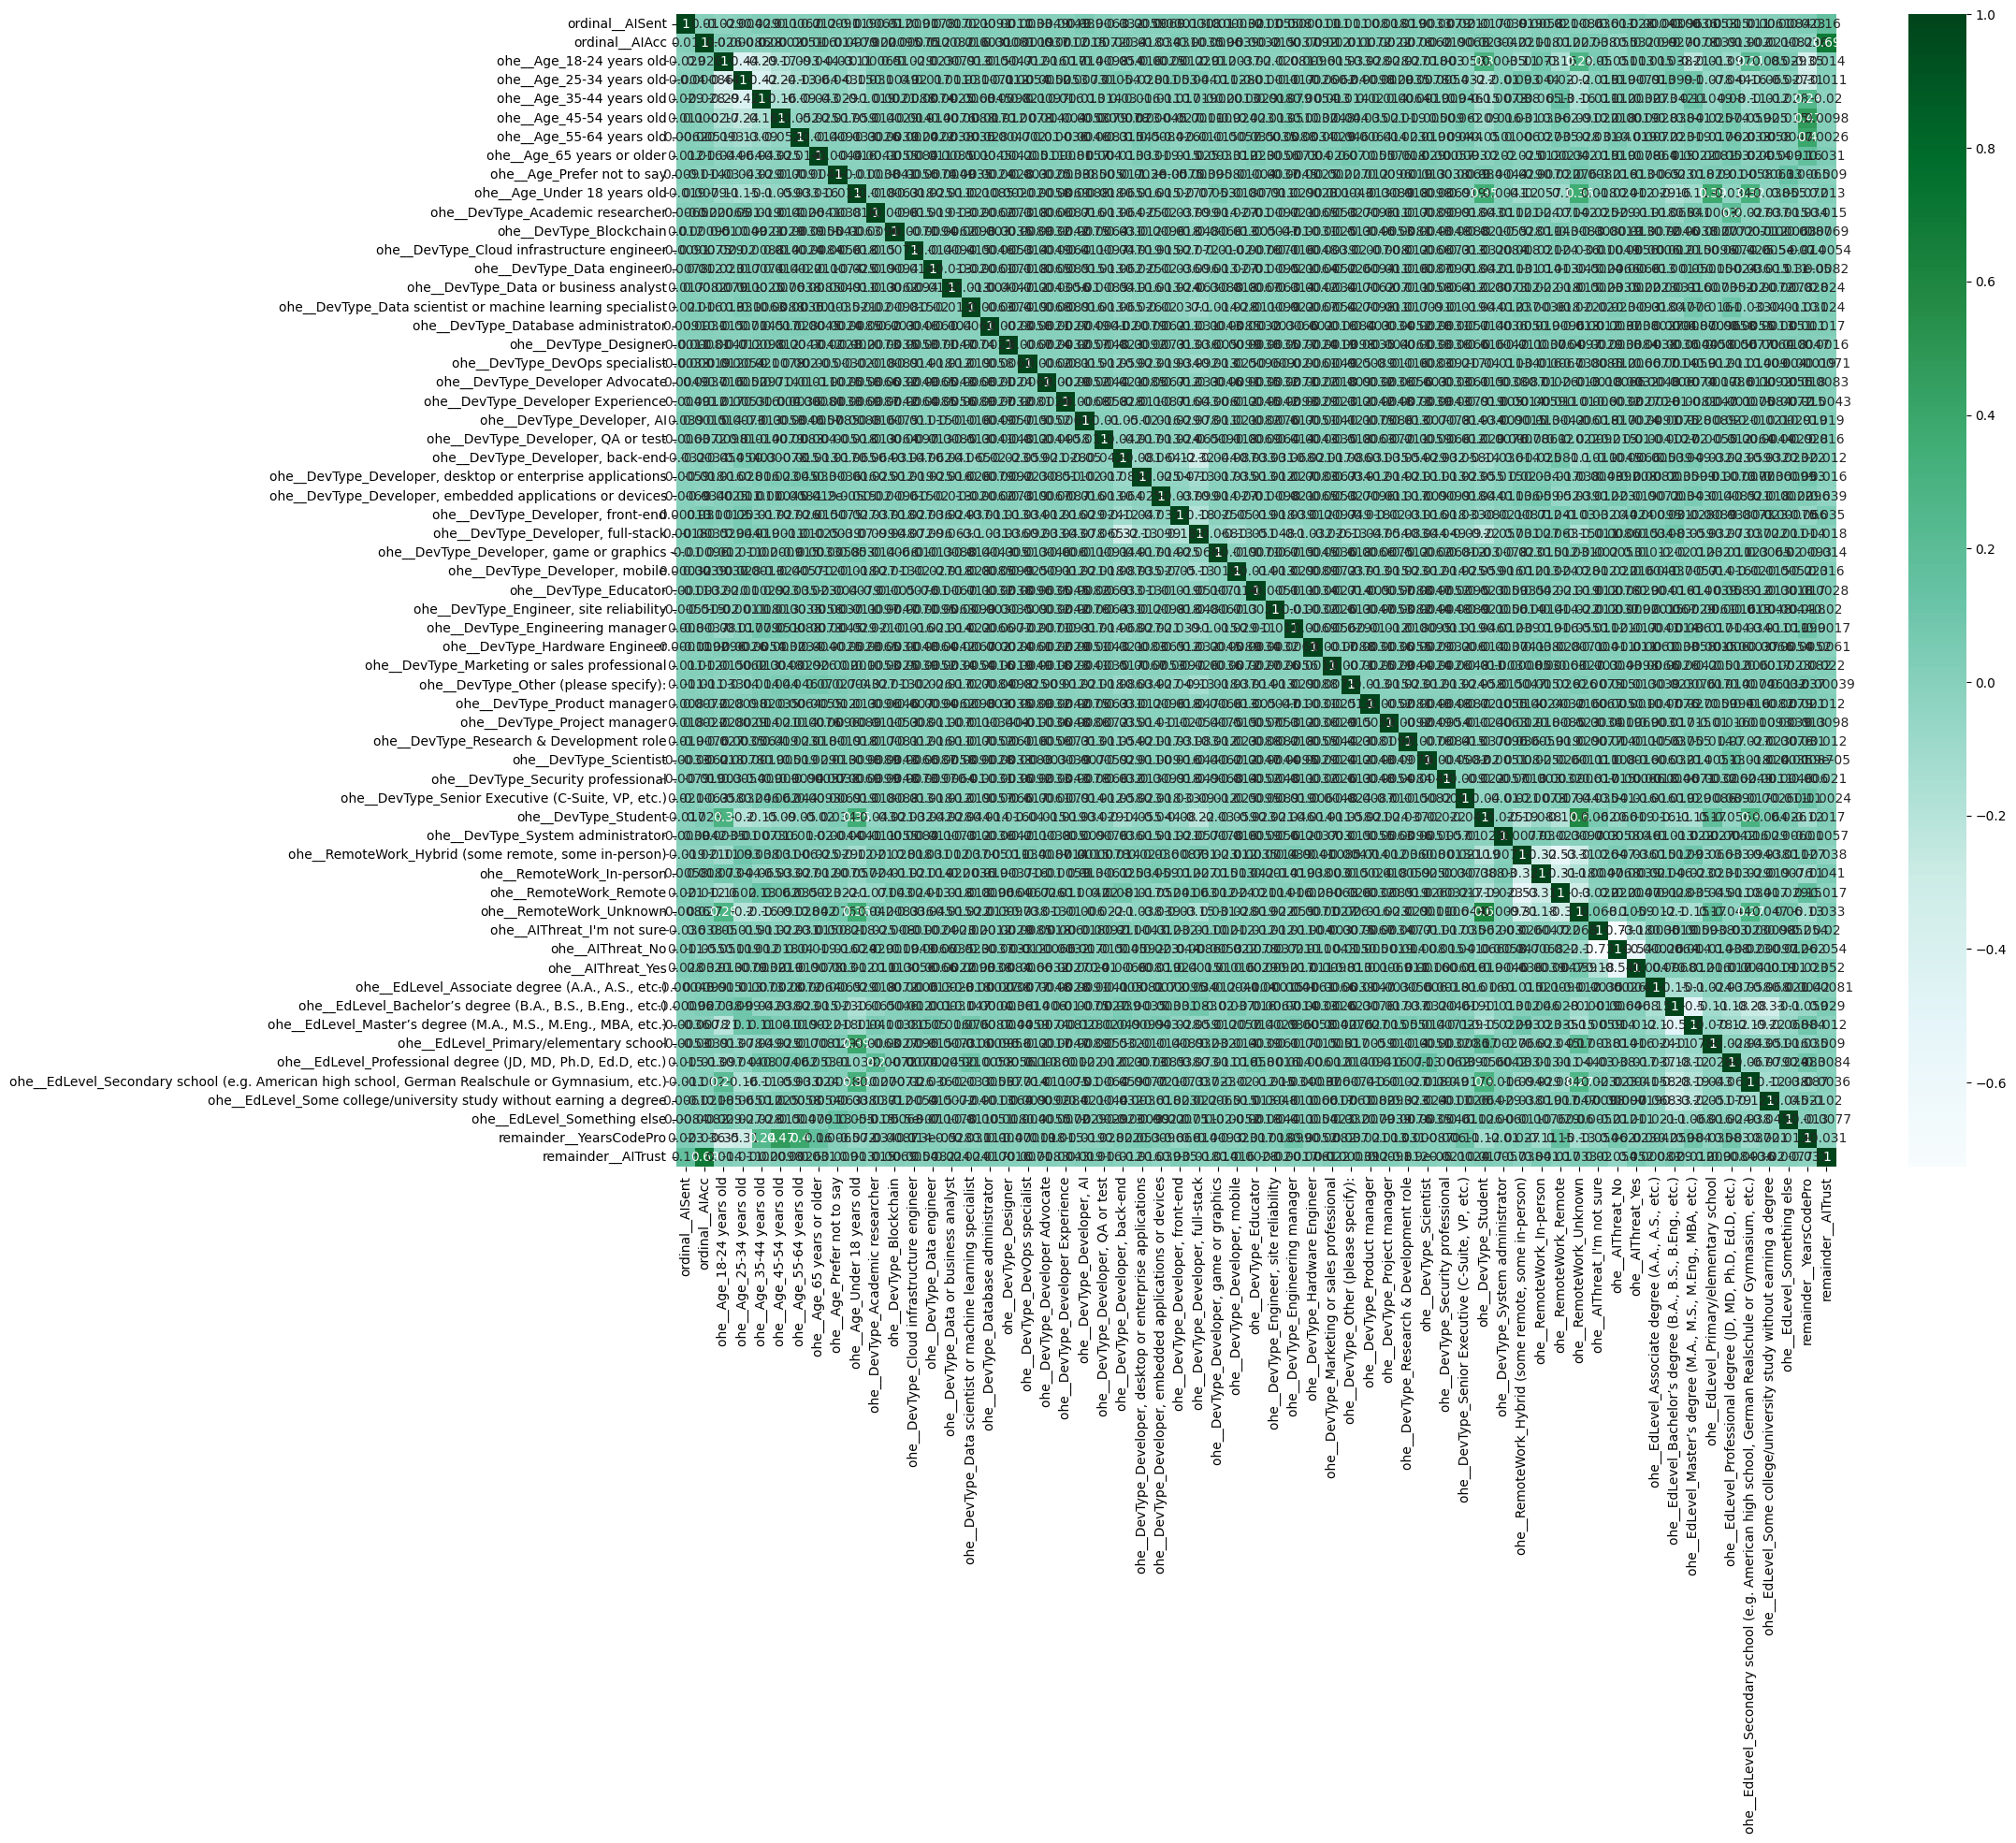

In [13]:
# Define columns
ordinal_cols = ['AISent', 'AIAcc']
onehot_cols = ['Age', 'DevType', 'RemoteWork', 'AIThreat', 'EdLevel']
passthrough_cols = ['YearsCodePro']

# Creating a column transformer to see correlations
col_trans = ColumnTransformer(
    [
        ("ordinal", OrdinalEncoder(), ordinal_cols),
        ("ohe", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_cols)
    ],
    remainder = 'passthrough'
)

# Fitting the transformer
col_trans.fit(df24c)

# Transform data
transformed = col_trans.transform(df24c)

# Automatically get correct feature names
feature_names = col_trans.get_feature_names_out()

# Converting into a dataframe
df24_t = pd.DataFrame(transformed, columns = feature_names)

df24_t_corr = df24_t.corr()

fig, ax = plt.subplots(figsize = (20,16))
sns.heatmap(df24_t_corr, annot = True, cmap = "BuGn")

<Axes: >

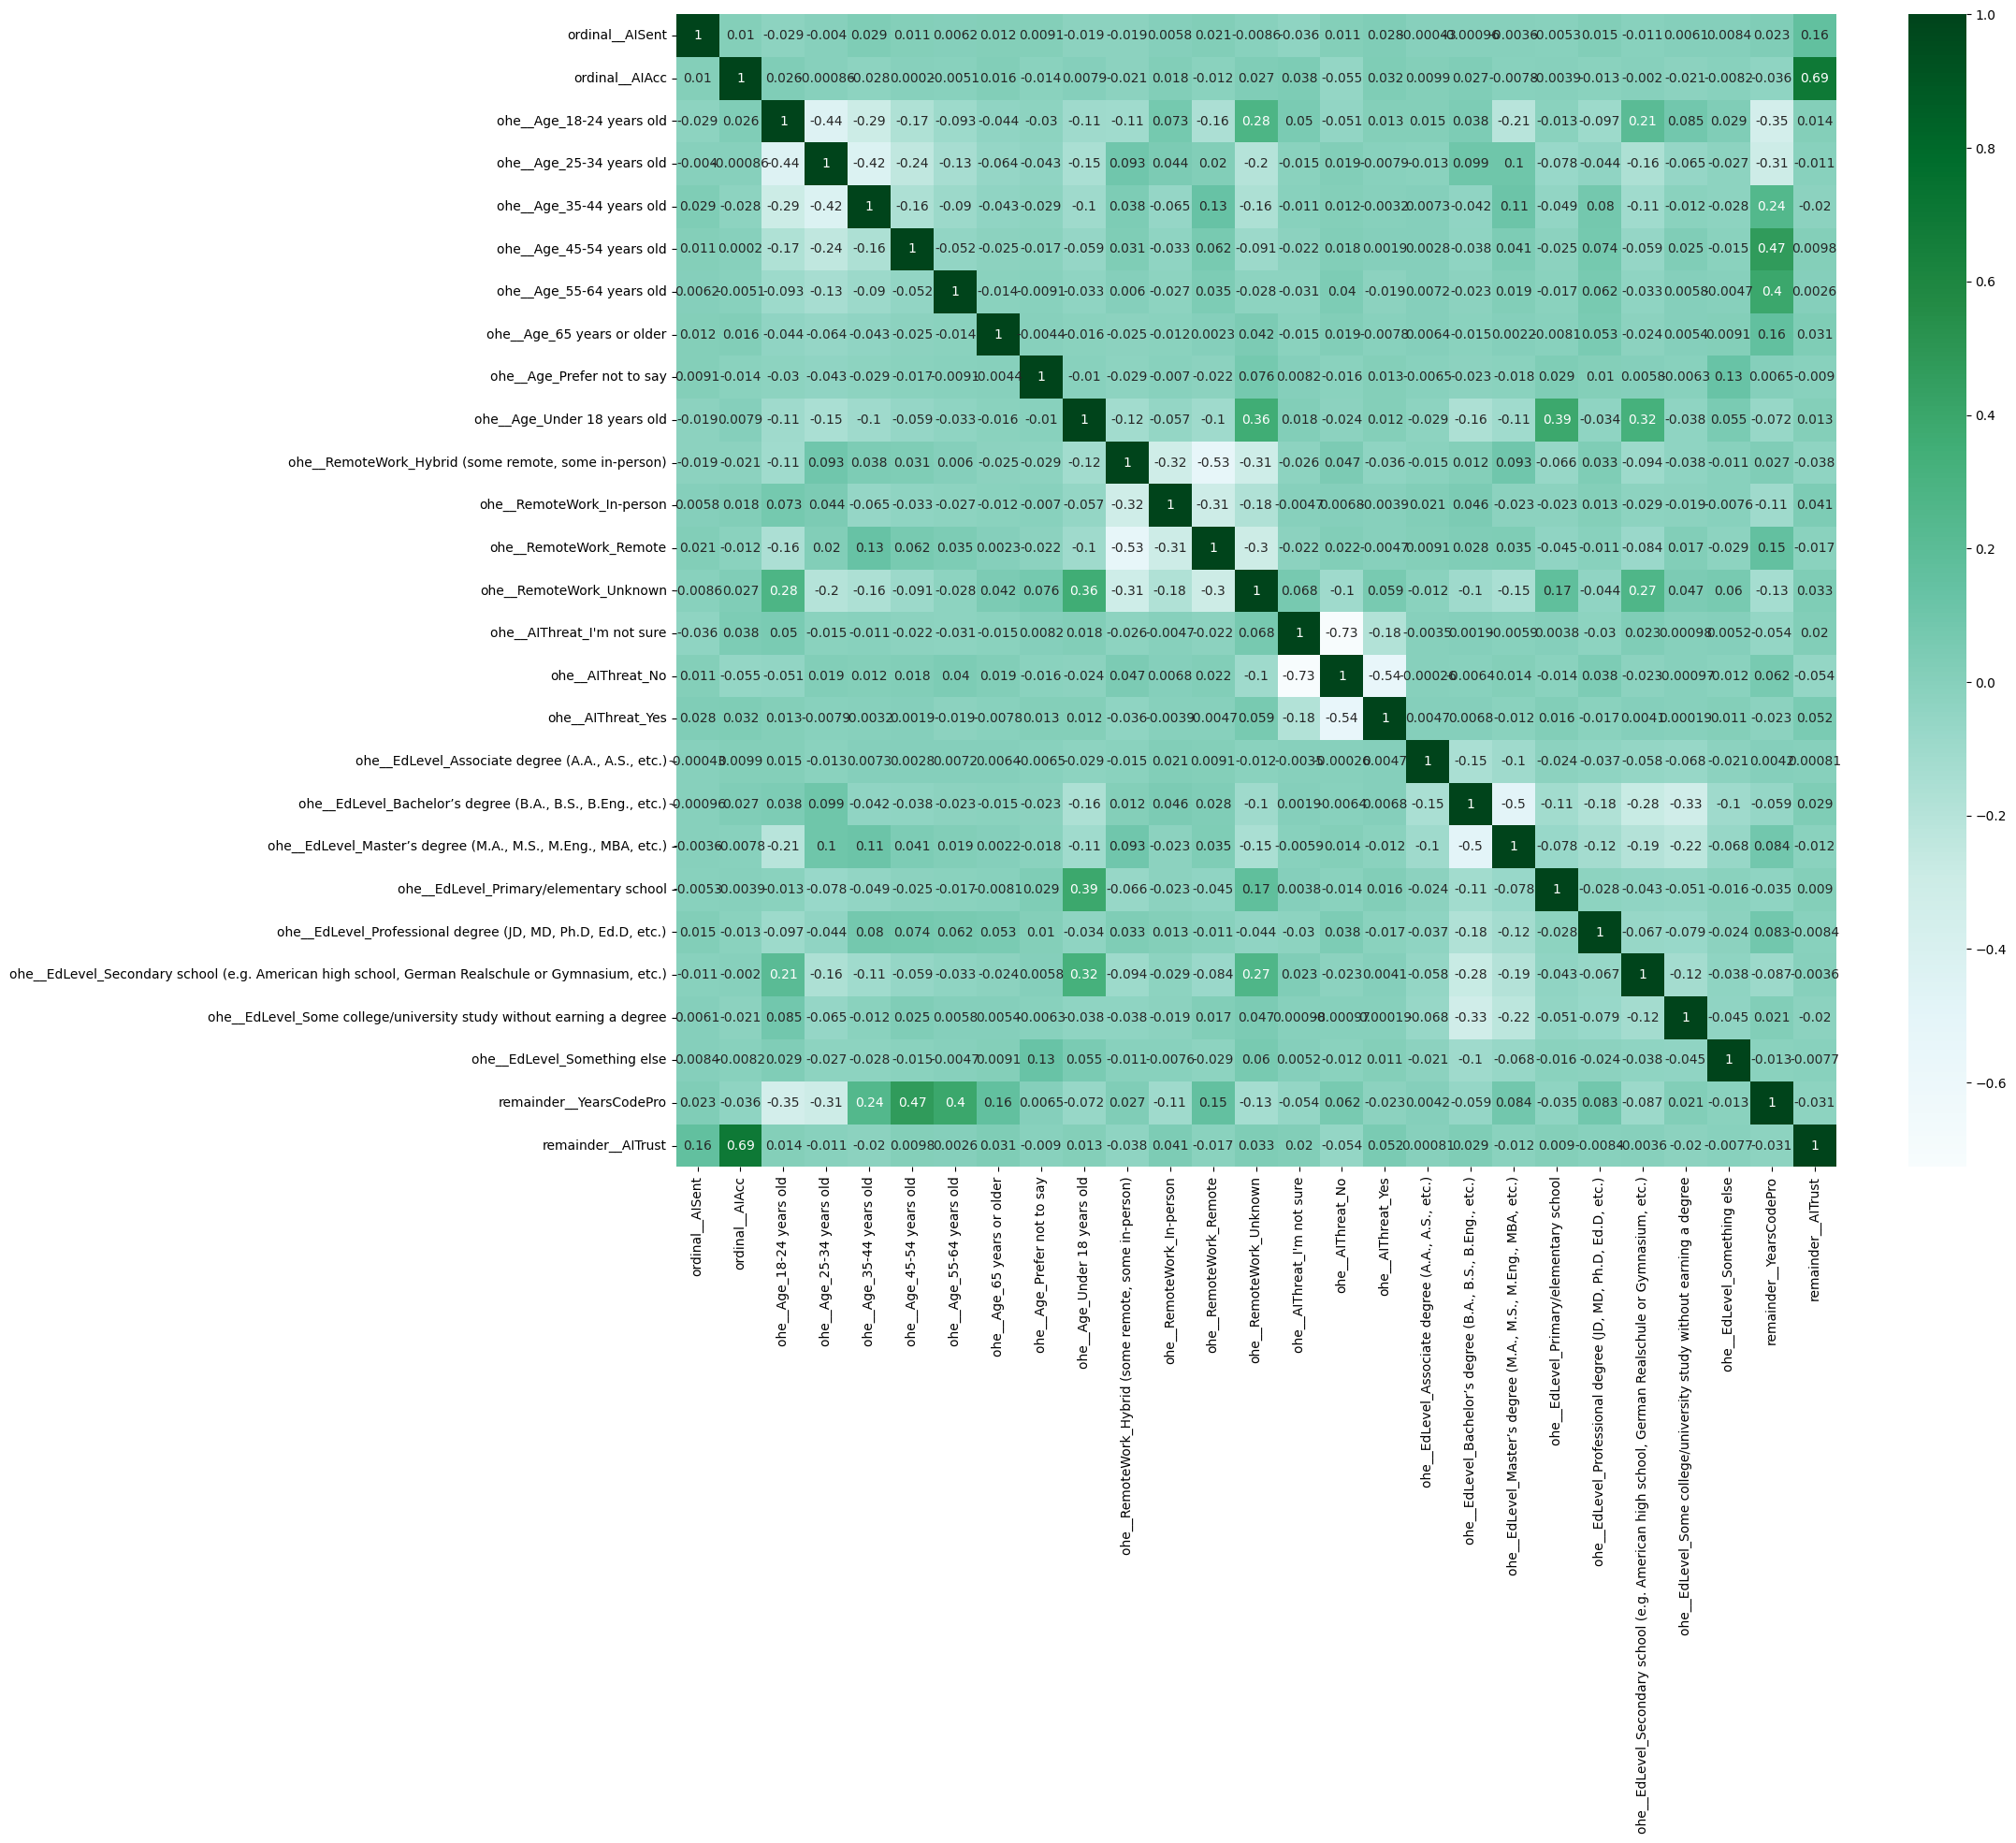

In [10]:
# Define columns
df24c.drop(columns = 'DevType', inplace = True)
ordinal_cols = ['AISent', 'AIAcc']
onehot_cols = ['Age', 'RemoteWork', 'AIThreat', 'EdLevel']
passthrough_cols = ['YearsCodePro']

# Creating a column transformer to see correlations
col_trans = ColumnTransformer(
    [
        ("ordinal", OrdinalEncoder(), ordinal_cols),
        ("ohe", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_cols)
    ],
    remainder = 'passthrough'
)

# Fitting the transformer
col_trans.fit(df24c)

# Transform data
transformed = col_trans.transform(df24c)

# Automatically get correct feature names
feature_names = col_trans.get_feature_names_out()

# Converting into a dataframe
df24_t = pd.DataFrame(transformed, columns = feature_names)

df24_t_corr = df24_t.corr()

fig, ax = plt.subplots(figsize = (20,16))
sns.heatmap(df24_t_corr, annot = True, cmap = "BuGn")

<Axes: >

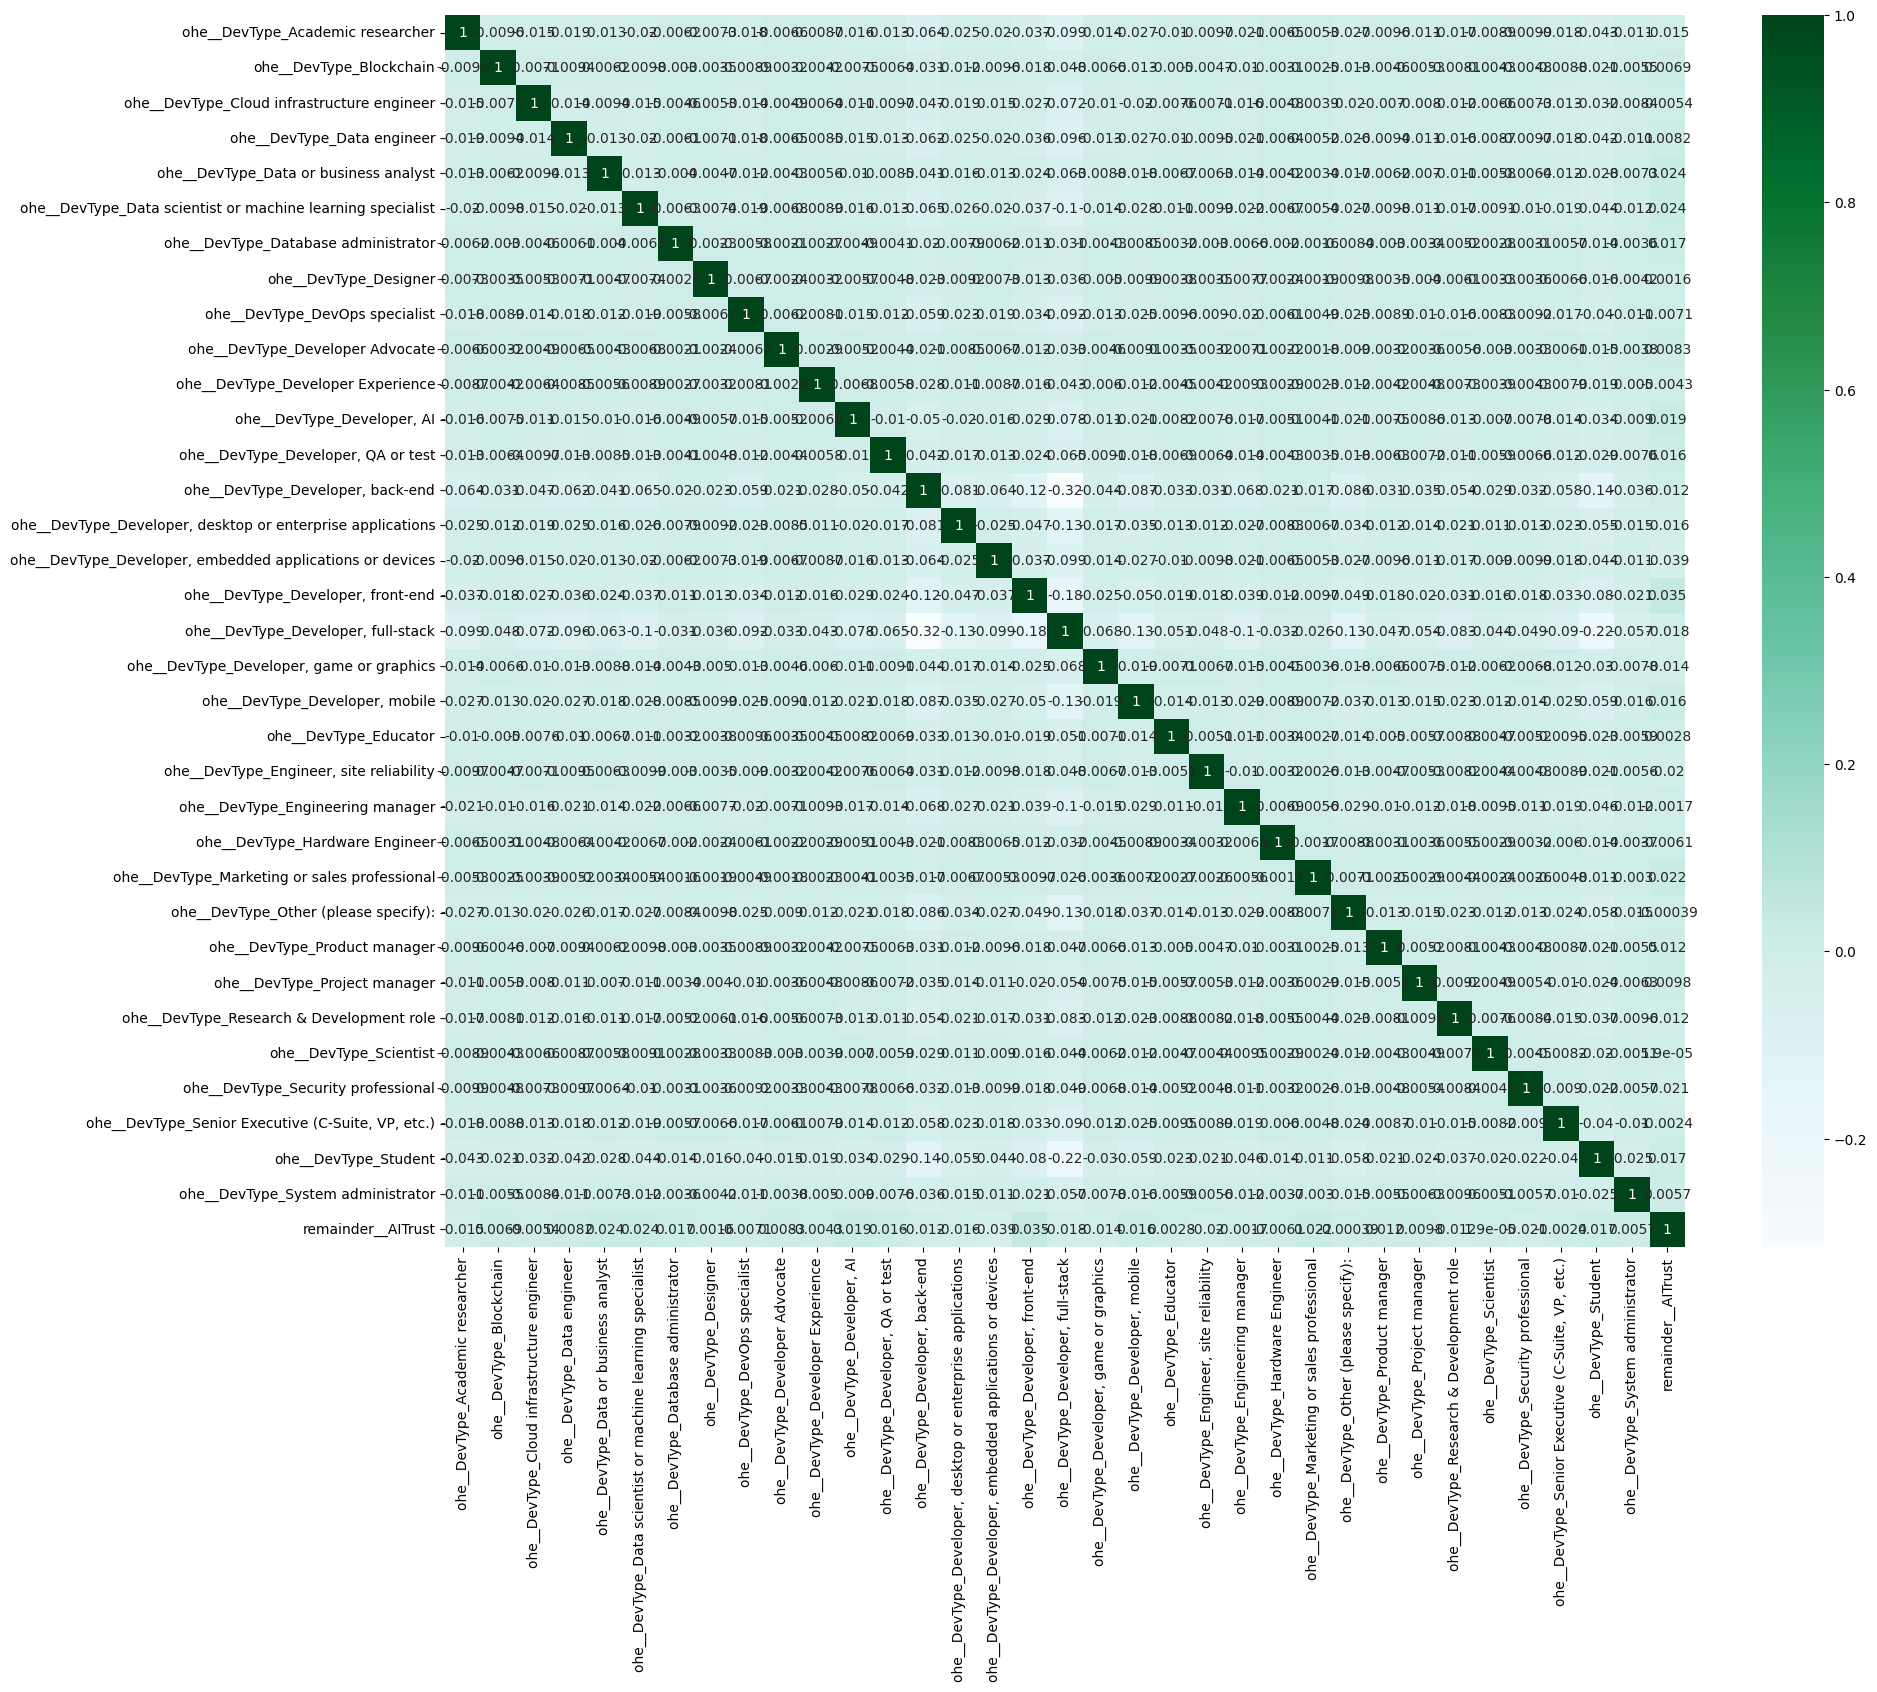

In [13]:
# Define columns
df24c.drop(columns = ['AISent', 'AIAcc', 'Age', 'RemoteWork', 'AIThreat', 'EdLevel', 'YearsCodePro'], inplace = True)
onehot_cols = ['DevType']

# Creating a column transformer to see correlations
col_trans = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_cols)
    ],
    remainder = 'passthrough'
)

# Fitting the transformer
col_trans.fit(df24c)

# Transform data
transformed = col_trans.transform(df24c)

# Automatically get correct feature names
feature_names = col_trans.get_feature_names_out()

# Converting into a dataframe
df24_t = pd.DataFrame(transformed, columns = feature_names)

df24_t_corr = df24_t.corr()

fig, ax = plt.subplots(figsize = (20,16))
sns.heatmap(df24_t_corr, annot = True, cmap = "BuGn")